#### **Business Case: To build a simple linear regression model which can predict a student's placement package based on their cgpa**

**1. Understand the data**

* **Input column:** This is your independent variable (predictor), e.g., CGPA.

* **Output column:** This is your dependent variable (response), e.g., placement package.

**2. Load the Dataset**

In [11]:
# Import required library
import pandas as pd

In [13]:
data = pd.read_csv('placement.csv')

**3. Explore the data**

In [16]:
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [18]:
data.tail()

,cgpa,package
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [22]:
data.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


**4. Visualize the Relationship**

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'CGPA VS Package')

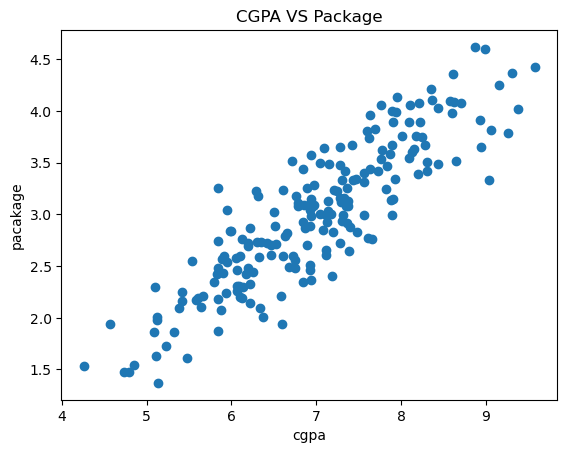

In [31]:
plt.scatter(data['cgpa'],data['package'])
plt.xlabel('cgpa')
plt.ylabel('pacakage')
plt.title('CGPA VS Package')

**5. Split the Data**

In [35]:
from sklearn.model_selection import train_test_split
X = data['cgpa']  # Input
y = data['package']   # Output
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [40]:
X_train = X_train.values.reshape(-1, 1)

In [48]:
X_test = X_test.values.reshape(-1,1)

In [80]:
X_train

array([[7.18],
       [7.21],
       [8.62],
       [6.53],
       [5.12],
       [6.93],
       [7.15],
       [7.48],
       [4.85],
       [7.61],
       [5.84],
       [6.75],
       [7.89],
       [5.91],
       [7.12],
       [8.44],
       [7.91],
       [7.69],
       [6.93],
       [7.11],
       [9.31],
       [5.98],
       [8.1 ],
       [8.94],
       [6.87],
       [7.39],
       [5.95],
       [8.11],
       [7.11],
       [5.64],
       [9.26],
       [6.78],
       [5.53],
       [6.89],
       [7.4 ],
       [6.94],
       [8.31],
       [7.19],
       [7.95],
       [5.42],
       [7.82],
       [8.99],
       [6.07],
       [6.26],
       [7.28],
       [4.79],
       [7.3 ],
       [5.99],
       [6.19],
       [5.48],
       [6.14],
       [6.76],
       [6.71],
       [6.35],
       [6.61],
       [7.89],
       [8.71],
       [6.73],
       [5.42],
       [5.23],
       [6.94],
       [6.96],
       [6.93],
       [5.84],
       [7.77],
       [6.17],
       [5.

In [82]:
y_train

79     3.00
197    3.24
38     4.36
24     2.71
122    2.01
       ... 
106    2.19
14     3.42
92     4.00
179    3.03
102    1.37
Name: package, Length: 160, dtype: float64

**6. Fit the Linear Regression Model**

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

**7. Evaluate the Model**

In [50]:
y_pred = model.predict(X_test)

In [78]:
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2_score = r2_score(y_test,y_pred)

print('Mean Absolute Error:' , mae)
print('Mean Squared Error:' , mse)
print('Root Mean Squared Error:' , rmse)
print('R2_Score:' , r2_score)

Mean Absolute Error: 0.23150985393278373
Mean Squared Error: 0.08417638361329657
Root Mean Squared Error: 0.2901316659954521
R2_Score: 0.7730984312051673


In [56]:
X_test.shape

(40, 1)

In [64]:
adj_r2_score = 1 - ((1-r2_score)*(40-1)) / (40-1-1)
print('Adjusted R2_Score', adj_r2_score)

Adjusted R2_Score 0.7671273372895138


**8. Visualize the Regression Line**

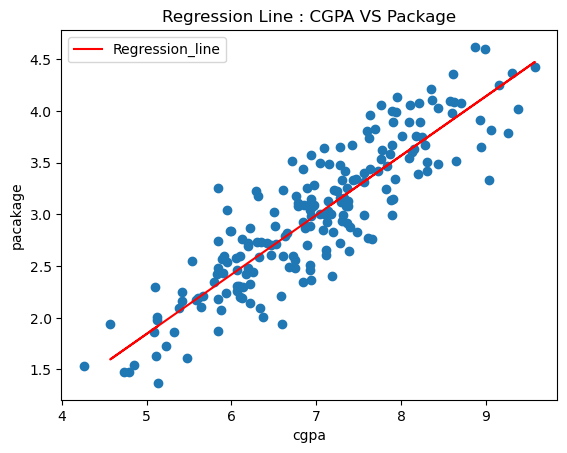

In [69]:
plt.scatter(data['cgpa'],data['package'])
plt.plot(X_train,model.predict(X_train), color = 'red' , label='Regression_line')
plt.xlabel('cgpa')
plt.ylabel('pacakage')
plt.title('Regression Line : CGPA VS Package')
plt.legend()
plt.show()

In [107]:
# Get values of slope and intercept

In [73]:
m = model.coef_
print('Model Coefficient',m)

Model Coefficient [0.57425647]


In [75]:
b = model.intercept_
print('Model Intercept',b)

Model Intercept -1.02700693745421


**9. Make Predictions**

In [84]:
new_cgpa = [[8.5]]
predicted_package = model.predict(new_cgpa)
predicted_package

array([3.85417308])

In [102]:
print("New Point Coordinates:")
print(f"CGPA: {new_cgpa}")
print(f"Predicted Package: {predicted_package[0]:.2f} LPA")

New Point Coordinates:
CGPA: [[8.5]]
Predicted Package: 3.85 LPA


Text(0.5, 1.0, 'Regression Line with New Point')

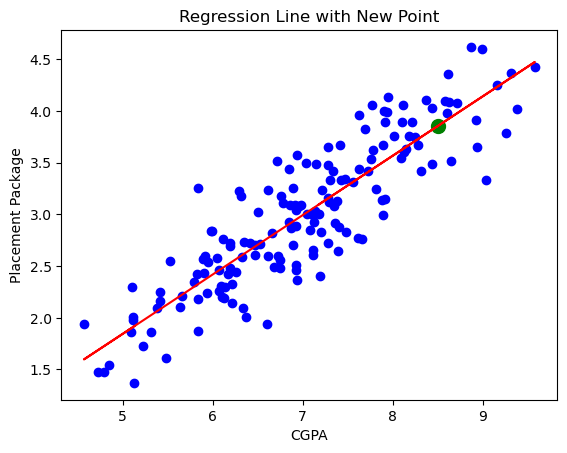

In [96]:
# Scatter plot for training data
plt.scatter(X_train, y_train, color='blue')

# Regression line for training data
plt.plot(X_train, model.predict(X_train), color='red')

# Plot the new point
plt.scatter(new_cgpa, predicted_package, color='green', s=100)

# Labels, title
plt.xlabel('CGPA')
plt.ylabel('Placement Package')
plt.title('Regression Line with New Point')